# Intro to Python and First law of Thermodynamics

In this tutorial we are going to go over some basic operations in Python that will guide you through the course and as an example we will use some of the thermodynamic concepts learned in class. 
This tutorial was heavily based on this [repo](https://sean-fitzpatrick.github.io/CalcLabs/IntrotoPython.html).  

In [1]:
# import numpy as matplotlib 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Thermodynamics recap

## First Law of Thermodynamics

The change in the internal energy (U) of a system is the sum of the heat (q) transferred to the system and the work (w) done on the system,
$$
dU = q + w
$$

## Heat
The energy that flows in between two objects that are at different temperatures. At constant pressure processes we can define heat as,
$$
dq_{p} = C_{P}dT,
$$
where $C_{P}$ is is the heat capacity of a substance at constant pressure, $C_{P} = mc_{p}$ where $m$ is the mass.

## P-V Work
Work in thermodynamics is defined as in classical mechanics, the energy transferred to a system by applying an external force along a displacement. 
In thermodynamics, one of the most common ways to do wok on a system is by changing the volume of the system through compression of expansion (P-V work).
P-V work is defined as,
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV
$$
where $P(T,V)$ is a function that describes the pressure of the system as a function of temperature (T) and its volume (V).
This type of integrals are known as **line integrals**. 



## Line integral
Let's compute the work done by a processes where the Pressure is given by,
$$
P(V) = \sin(V) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The initial and final volume for this processes are, $V_i = 10$ and $V_f=5$.


In [ ]:
# define the P function
# def f_P(v):
#     # code here
#     return p


# plot this process V vs P where the area under the curve is also coloured 
# tips, plt.fill_between() 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between

Text(0, 0.5, 'P')

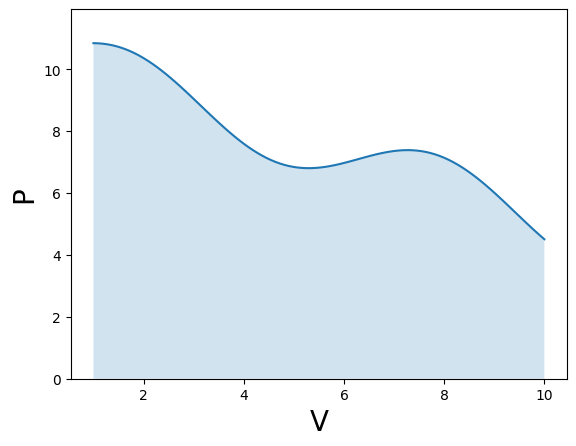

In [48]:
def f_P(V):
    a = -0.55
    b = 10.55
    p = np.sin(V) + a*V + b
    return p

vi = 1.
vf = 10

n = 100
v = np.linspace(vi, vf, n)
p = f_P(v)

# plotting
plt.plot(v, p)
plt.fill_between(v,p,alpha=0.2)
plt.ylim(0,np.max(p)+1.1)
plt.xlabel('V',fontsize=20)
plt.ylabel('P', fontsize=20)

What are the initial and final pressure? 

In [ ]:
# code here

Using numerical integration, compute the value of the work for this process. <br>
The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) is one of the most common numerical integration strategies,
$$
\int_a^b f(x) dx \approx  \sum_{i=1}^N \frac{f(x_{i-1}) + f(x_{i})}{2} \Delta x \\
\int_a^b f(x) dx \approx \sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x + \sum_{i=1}^N \frac{f(x_{i})}{2} \Delta x
$$

where the partition of $[a,b]$ is $x_0 < x_1 < \cdots < x_N$ where $a = x_0$ and $b = x_N$. <br>
$\Delta x$ is the difference between two consecutive points, $\Delta x = x_{i+1} - x_i$.

Let's consider 5 grid points $x_0 < x_1 < x_2 < x_3 < x_4$. <br>
How many terms does each term have? 

<!-- $$
\sum_{i=1}^N \frac{f(x_{i-1})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
$$
\sum_{i=1}^N \frac{f(x_{i})}{2}\Delta x = \frac{\Delta x}{2} \left( f(x_0) + f(x_1) + f(x_2) + f(x_3) + f(x_4) \right)
$$
if we sum both terms we get, 
$$
\int_a^b f(x) dx \approx  \frac{\Delta x}{2} \left(  f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + 2f(x_4)  \right)
$$ -->

In [ ]:
# code for trapezoidal rule
def trap_rule(y, dx):
    int_value = # what is the first value of the integral
    for yi in y[1:]:
        int_value += # update the value of the integral
    return int_value

In [67]:
# code for trapezoidal rule
def trap_rule(y, dx):
    int_value = y[0]*(dx/2)
    for yi in y[1:]:
        int_value += yi*dx
    return int_value

In [30]:
# code here
# vi = # variable for initial volume
# vf = # variable for final volume
# n = # number of points for the integration grid
# dv = # width of the rectangles for integration

# code to do numerical integration

# print('Number of grid points ', n)
# print('Value of work, ', w)

In [65]:
vi = 1.
vf = 10
    
n = 500    
v = np.linspace(vi,vf, n) # grid of volume
dv = v[1] - v[0]
p = f_P(v) # value of pressure at each volume

w = trap_rule(p,dv)

print('N =  ', n)
print('DV = ', dv)
print('work = ', w)
                       

N =   500
DV =  0.018036072144288484
work =  69.14497152238982


Compute the true value of $P(T,V)$ for this process.
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV = -\int_{V_{i}}^{V_{f}} \left ( \sin(V) + a V + b \right ) dV 
$$
where $a = -0.55$ and $b = 10.55$.

<!-- w = -69.1044 -->

Using your code, how many grid points are required for numerical integration to approximate the true value  95%.
The formula for mean percentage error (MPE) for a single point is,
$$
MPE =  \left| \frac{y - \hat{y}}{y} \right|100\%,
$$
where $\hat{y}$ is the true or exact value and $y$ is the predicted one.


In [ ]:
# # create a function for the MPE
# def MPE(y, y_hat):
#     #code here
#     return value

In [36]:
# create a function for the MPE
def MPE(y,y_hat):
    e = (y - y_hat)/y_hat
    return np.abs(e) * 100

100 69.3082
300 69.1721
500 69.1450
700 69.1334
900 69.1269
1100 69.1228
1300 69.1200
1500 69.1179
1700 69.1163
1900 69.1150
2100 69.1140
2300 69.1132
2500 69.1125
2700 69.1119
2900 69.1114
3100 69.1109
3300 69.1105
3500 69.1102
3700 69.1099
3900 69.1096
4100 69.1093
4300 69.1091
4500 69.1089
4700 69.1087
4900 69.1085


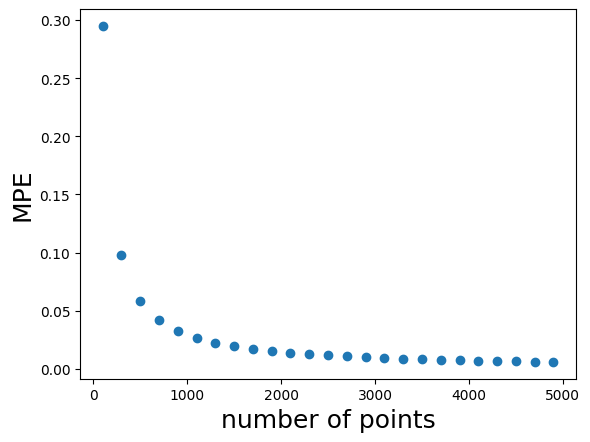

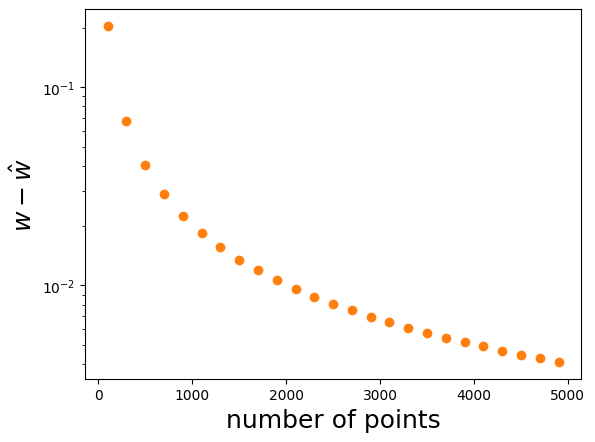

In [97]:
n_ = np.arange(100,5100,200)

w_exact = 69.1044
mpe_ = [] # list to store the values
w_ = []
for n in n_:
    v = np.linspace(vi,vf, n) # grid of volume
    dv = v[1] - v[0]
    p = f_P(v) # value of pressure at each volume

    w = trap_rule(p,dv)
    w_.append(w)
    mpei = MPE(w,w_exact)
    mpe_.append(mpei)
    print(n, f'{w:.4f}')

w_ = np.array(w_)
mpe_ = np.array(mpe_)

# plot
plt.figure(0)
plt.scatter(n_,mpe_)
plt.xlabel('number of points',fontsize=18)
plt.ylabel('MPE', fontsize=18)


# plot
plt.figure(1)
plt.scatter(n_, w_ - w_exact,color='tab:orange')
plt.xlabel('number of points', fontsize=18)
plt.ylabel(r'$w - \hat{w}$', fontsize=18)
plt.yscale('log')
    

# Heat Capacity
the heat capacity $C_{P}$ of a substance is the amount of heat absorbed by the system to increase its temperature 1C. <br>

Experimentally one can measure the $C_{P}$ of a substance using a calorimeter for example, where we can measure the temperature and the amount of heat transferred to the substance. <br>
We can approximate the computation of $C_{P}$ as, 
$$
C_{P} = \frac{q}{\Delta T}
$$


The following experimental data contains the measured amount of heat (q) to change 1 kg of an unknown material from the initial temperature ($T_i$) to a final one ($T_f$). <br>

| heat (kJ)   | $T_i$ (C) | $T_f$ (C) |
| -------- | ------- | ------- |
| 9.08 | 21.5 | 31.38 |
| 10.52 | 40.4 | 51.93 |
| 10.27 | 60.36 | 71.44 |
| 7.6 | 81.75 | 90.1 |
| 8.1 | 101.97 | 110.84 |
| 8.38 | 121.32 | 130.31 |
| 9.0 | 141.07 | 150.75 |

**Exercise** <br>
1. Compute the mean and the standard deviation of the $C_{P}$ using this experimental data.

Tips:
1. [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
2. [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [118]:
# code here!

In [117]:
ti_and_tf = np.array([[ 20.96,  31.29],
 [ 40.07,  51.09],
 [ 61.26,  71.5 ],
 [ 81.83,  91.61],
 [100.41, 110.78],
 [121.26, 130.75],
 [141.49, 151.29]])

dT = ti_and_tf[:, 1] - ti_and_tf[:,0]
q = np.array([8.22, 8.66, 9.41, 8.99, 8.91, 9.53, 9.07])
cp = q/dT
print(cp)

av_cp = np.mean(cp)
std_cp = np.std(cp)
print('mean Cp = ', av_cp)
print('std CP = ', std_cp)

[0.79574056 0.78584392 0.91894531 0.9192229  0.85920926 1.00421496
 0.9255102 ]
mean Cp =  0.8869553032394715
std CP =  0.07232303616479824
